# Prediction of Essential Tremor by Assesssing Brain Functional Connectivity measures using Machine Learning Algorithms

INTRODUCTION

Essential Tremor (ET) is one of the most prevalent chronic neurological disorders, mainly observed in adults. It is characterised by a tremor in limbs, head, trunk, voice and tongue. Most commonly, kinetic tremor of the upper limbs is observed in ET patients. In 2020, the global prevalence of ET in the general population was 0.32% (ranging from 0.04% in people <20 years to 2.87% in people > 80 years and above). The total number of people suffering from ET worldwide was 24.91 million in 2020, was reported in a systematic review article by Peige and colleagues (Song et al., 2021).
Several studies reported ET as a monosymptomatic disease with motor (such as dystonia, cerebellar signs, and disturbances of gait, speech and balance) and non-motor symptoms (such as anxiety, depression, cognitive impairment, and apathy). The International Parkinson and Movement Disorder Society has declared ET as a heterogeneous disorder according to the 2018 consensus statement on tremor disorders. (Bhatia KP et al., 2018; Louis ED, 2018)
In the past few decades, advances in neuroimaging modalities have provided valuable insights into the pathophysiology of ET. Neuronal degeneration in the cerebellum and functional connectivity loss in the cerebello-thalamo-cortical tracts has been found in ET patients (Bhalsing KS et al., 2013; Lenka et al., 2017). Additionally, the abnormalities in the ET brain were found due to an altered Purkinje cell population (Louis ED et al., 2019).

AIM OF THE PROJECT

Though ET is considered a benign neurological disorder but a wide range of symptoms and comorbidities could be seen as ET progresses, leading to disability, impaired quality of life and social handicap. With the advancement of ET, patients face problems carrying out their daily activities and often rely on others' help. There are an increasing number of cases each year worldwide, making it very important to diagnose at an early stage. Therefore, this project aims to create a model that will effectively diagnose ET in its early stage, which will be helpful from a public health perspective.

In this work, we showed that even during the rest phase, the brain dynamics of ET patients differ from those of healthy controls (HC). In this regard, we selected the resting-state functional 3T MRI images of the brain. Then, each brain region's signal (also known as BOLD time series) was extracted for cerebellum, subcortical, and cortical area using a brain parcellation atlas (in our case, by Shen Atlas). Then, we extracted various brain connectivity feature from those BOLD time series. Following that, we plotted the raw signal, connection matrix, and all the features using a visual representation like violin plots. Finally, in order to determine whether the brain dynamics of ET patients can be distinguished from those of healthy individuals (HC), we applied various classification algorithms. 

INFORMATION OF DATASET

Note that the clean BOLD time series data from the study 1 below (Bharath et al., 2022) were obtained by contacting the authors directly. Based on the authors' published work, the features were chosen. Those features were calculated using the freely accessible github codes from the clean BOLD fMRI time series.

We have taken 30 patient with essential tremor (ET) data (mean (age ± SD 37.33) ± 10.67 years, 6
Females, all righthanded participants) and age gender matched 30 healthy control (HC, mean (age ± SD) 38.2 ± 10.7
years, 4 Females, all righthanded participants). We took the clean resting fMRI time series that was extracted using Shen 2015 atlas for cortical, subcortical and cerebellum areas. The fMRI data were recorded in 3T MRI scanner (Skyra; Siemens, Erlangen,
Germany) at NIMHANS, Bengaluru, India). This clean resting fMRI time series was used to extract different static and dynamic connectivity features based on below mentioned author papers (Bharath et al., 2022). The Features are mean dynamic functional connectivity (DFC), network integration, network segregation, whole brain synchronization, metastability, and intrinsic ignition that were extracted from the BOLD time series.


Papers:

1. Bharath, Rose Dawn, et al. "Single session of rTMS enhances brain metastability and intrinsic ignition." bioRxiv (2022): 2022-08. https://www.biorxiv.org/content/10.1101/2022.08.14.503887v1

2. Lenka, Abhishek, et al. "Role of altered cerebello-thalamo-cortical network in the neurobiology of essential tremor." #Neuroradiology 59 (2017): 157-168.

Github: https://github.com/RajanikantPanda/rTMS_ET_Brain_Metastability_Ignition #The features were extracted using matlab as their code was available only in matlab.

# To classify Healthy Control (HC) and Essential Tremor (ET) Patients using resting state fMRI static and dynamic connectivity features 


##### Importing all the required Libraries which we will be using in the program. To avoid confusion, we will be listing all the Libraries at the starting of program

In [22]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline
import math
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr   

##### First import the clean BOLD fMRI timeseries data for both HC and ET patients 

The data are stored in a .mat file format (i.e., ts_tmp_hc and ts_tmp_pt), which we importaed here from the local disk.

Note that the data were stored in a 3D (i.e., n_sub_* x N_* x T_*) format. Here n_sub_* is number of subjects, N_* is no of brain regions for every subject (in our case 268) and T_* is no. of time point (also called no. of dynamics) for every subjects (in our case 245 fMRI dynamics which was recorded in 10 min and each dynamics time of repeat (TR) is for 2 sec).

In [23]:
#Import the clean BOLD fMRI timeseries data for both healthy control (i.e., ts_tmp_hc) and ET patients (i.e., ts_tmp_pt)
ts_tmp_hc = sio.loadmat('Data_BOLD_timeseries_HC_ET')['HC']
ts_tmp_pt = sio.loadmat('Data_BOLD_timeseries_HC_ET')['ET']
print(ts_tmp_hc.shape)
print(ts_tmp_pt.shape)
TR=2
# n_sub= number of subjects 
# N= number of ROIs (brain regions; in our case 268 ROIs extracted using Shen-2015 atlas)
# T=number of time points/dynamics (in TR = 2sec) of the fMRI/BOLD data
n_sub_hc, N_hc,T_hc = np.shape(ts_tmp_hc)
n_sub_pt, N_pt,T_pt = np.shape(ts_tmp_pt)

(30, 268, 245)
(30, 268, 245)


# Display fMRI BOLD timeseries data for both HC and ET patients
First to understand how the brain regions signals (BOLD time series) of healthy subjects and ET patient look like, we have ploted one healthy subjects and one ET patient raw BOLD time series data.

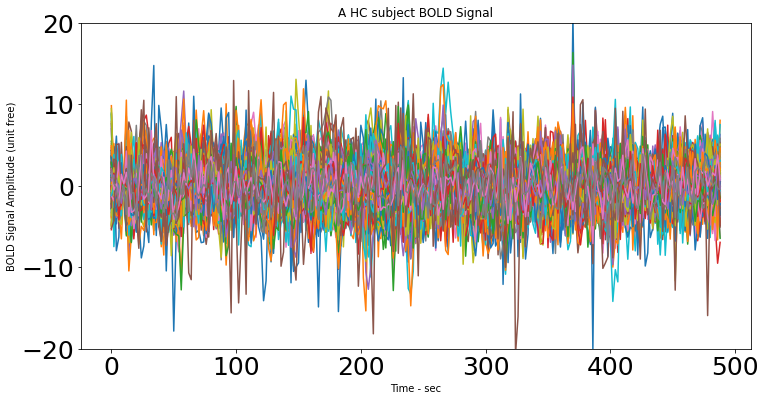

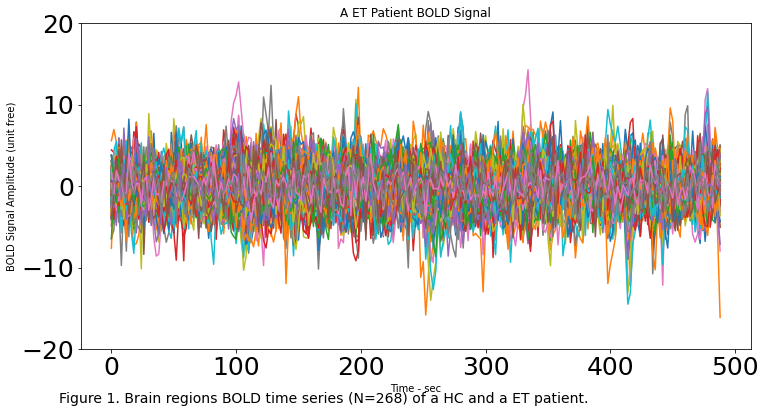

In [24]:
    #Analyze bold data - Visualize clean BOLD time series 
    
    #Show one HC subject bold time series
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_hc)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_hc[1,:,:].T) # to view other subject signal, change 1st dimension number
    plt.axis(ymin=-20, ymax=20)
    plt.xlabel('Time - sec')
    plt.ylabel('BOLD Signal Amplitude (unit free)')
    plt.title ('A HC subject BOLD Signal')
    plt.show()
    
    #Show one ET patient bold time series
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_hc)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_pt[1,:,:].T) # to view other subject signal, change 1st dimension number
    plt.axis(ymin=-20, ymax=20)
    plt.xlabel('Time - sec')
    plt.ylabel('BOLD Signal Amplitude (unit free)')
    plt.title ('A ET Patient BOLD Signal')
    txt="Figure 1. Brain regions BOLD time series (N=268) of a HC and a ET patient."
    plt.figtext(0.1, 0.001, txt, fontsize=14)
    plt.show()

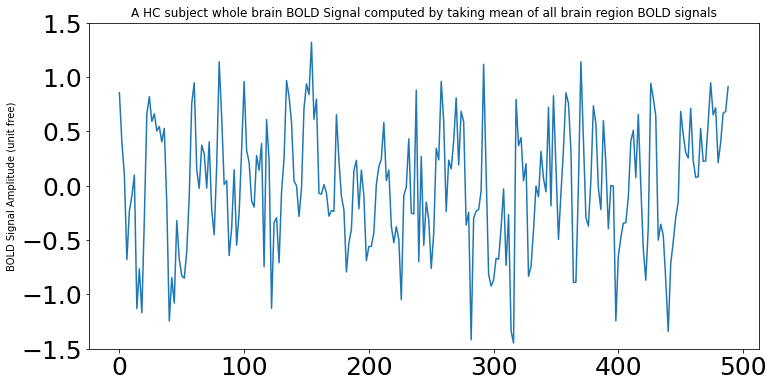

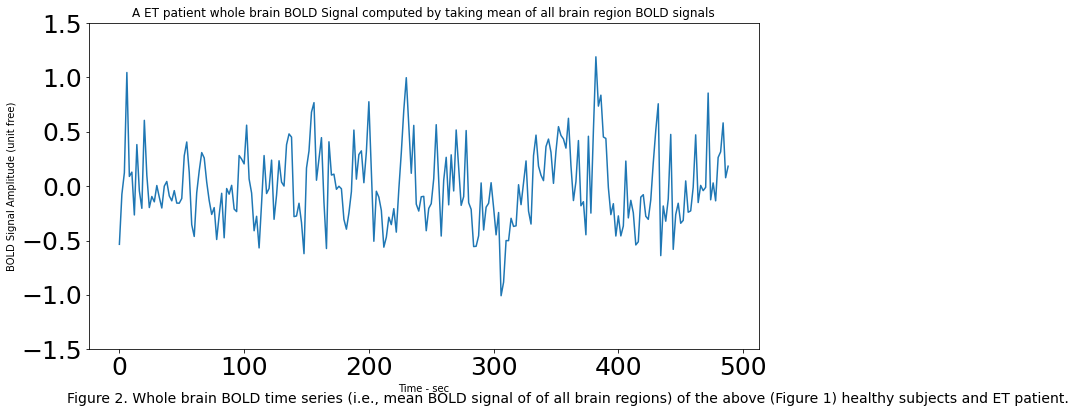

In [25]:
    #Analyze bold data - Visualize averaged bold time series
    
    #Show average bold timeseries of one HC 
    ts_tmp_hc_mean_sig = np.mean(ts_tmp_hc,axis=1) # average all ROIs signal (2nd dimension)
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_hc)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_hc_mean_sig[1,:]) # show one subject averaged signal (to view other subject change 1st dimension number)
    plt.axis(ymin=-1.5, ymax=1.5)
    plt.ylabel('BOLD Signal Amplitude (unit free)')
    plt.title ('A HC subject whole brain BOLD Signal computed by taking mean of all brain region BOLD signals')
    plt.show()
    
    #Show average bold timeseries of one ET patient
    ts_tmp_hc_mean_sig = np.mean(ts_tmp_pt,axis=1) # average all ROIs signal (2nd dimension)
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_pt)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_hc_mean_sig[1,:]) # show one subject averaged signal (to view another subject change 1st dimension number)
    plt.axis(ymin=-1.5, ymax=1.5)
    plt.xlabel('Time - sec')
    plt.ylabel('BOLD Signal Amplitude (unit free)')
    plt.title ('A ET patient whole brain BOLD Signal computed by taking mean of all brain region BOLD signals')
    txt="Figure 2. Whole brain BOLD time series (i.e., mean BOLD signal of of all brain regions) of the above (Figure 1) healthy subjects and ET patient."
    plt.figtext(0.1, 0.001, txt, fontsize=14)
    plt.show()

### Explanation Figure 1 and 2.

We plotted raw BOLD time series data for one healthy individual and one ET patient in Figures 1 and 2. From the raw signal, it is not possible to differentiate the ET patient brain from healthy brain. Also, its difficult to make any inference. Therefore, we need to apply neuroimaging methods such as brain connectivity and network theory measures to understand how the ET patients' brain dynamics alter as compared to healthy controls.

A basic neuroimaging measure is static connectivity, which we can compute using Pearson correlation coefficient between each pair of brain regions resulting from a N x N matrix called connectivity matrix. Unlike effective connectivity measures, the Pearson correlation coefficient does not account for the directionality. However, static connectivity is a simple classical approach, where we get overall ideas if there is any difference between patient groups and healthy subjects.

Note: We will use the same subject data as Figures 1 & 2 to compare their connectivity profile

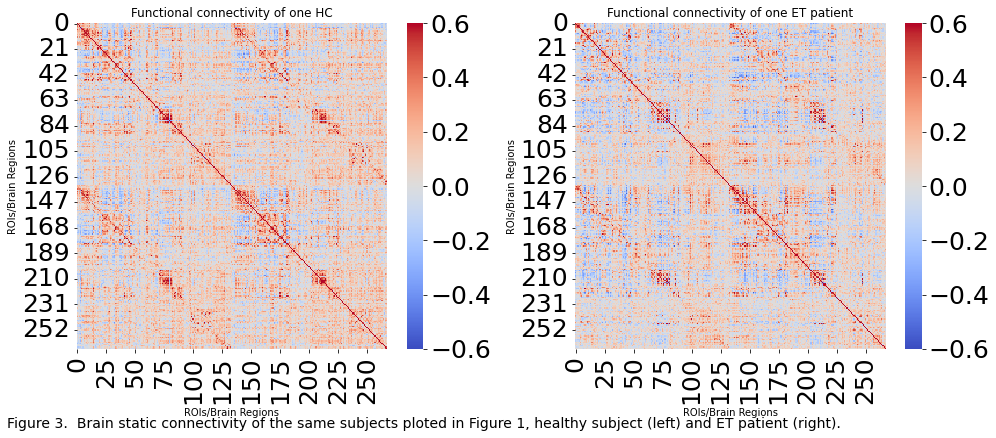

In [26]:
    #Analyze BOLD data - Visualize functional connectivity of one HC and one ET patient data
    
    # Create FC and visualise it for HC
    fc = np.corrcoef(ts_tmp_hc[1,:,:]) #to view other subject connectivity, change 1st dimension number
    np.shape(fc)
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.heatmap(fc, vmin=-0.6, vmax=0.6, cmap="coolwarm")
    #sns.color_palette("Spectral", as_cmap=True)
    plt.xlabel('ROIs/Brain Regions')
    plt.ylabel('ROIs/Brain Regions')
    plt.title('Functional connectivity of one HC')
    
    # Create FC and visualise it for ET
    fc = np.corrcoef(ts_tmp_pt[1,:,:]) #to view other subject connectivity, change 1st dimension number
    np.shape(fc)
    plt.subplot(1,2,2)
    sns.heatmap(fc, vmin=-0.6, vmax=0.6, cmap="coolwarm") 
    plt.xlabel('ROIs/Brain Regions')
    plt.ylabel('ROIs/Brain Regions')
    plt.title('Functional connectivity of one ET patient')
    plt.tight_layout()
    txt="Figure 3.  Brain static connectivity of the same subjects ploted in Figure 1, healthy subject (left) and ET patient (right)."
    plt.figtext(0.01, 0.001, txt, fontsize=14)
    plt.show()

### Explanation of Figure 3.

In Figure 3. Brain static connectivity between each pair of brain regions. In this connectivity matrix, the values represent linear correlation between their corresponding pair of brain regions (i.e., x & y axis ROIs). Higher the values, the stronger the correlation between their corresponding brain regions. It shows that the ET patients have decreased positive connectivity and have increased negative connectivity (anti-correlation) between many regions. Various neuroimaging studies have reported that brain connectivity fluctuates over time. By accounting temporal repertoire of brain connectivity, we could better distinguish the brain connectivity patterns of neuropsychiatric patients compared to health subjects. Therefore, in the next step, we compute dynamic functional connectivity using phase-based correlation analysis at each time point and various other dynamic measures as described below.

# FOLLOWING BRAIN DYNAMIC FEATURES WERE EXTRACTED: i) Dynamic Functional Connectivity (dFC), ii) Whole brain dFC, iii) Network segregation and  integration, iv) Whole brain syncronisation, v) Metastability, vi) Intrinsic Ignition.

The clean fMRI time series data have been taken from below paper 1 (Bharath et al., 2022) by directlly contacting to the authors. The features were selected based on authors publication. Those feature were computed from the clean BOLD fMRI time series using there available codes from github.

Papers:

1. Bharath, Rose Dawn, et al. "Single session of rTMS enhances brain metastability and intrinsic ignition." bioRxiv (2022): 2022-08.

2. Lenka, Abhishek, et al. "Role of altered cerebello-thalamo-cortical network in the neurobiology of essential tremor." #Neuroradiology 59 (2017): 157-168. 

Github: https://github.com/RajanikantPanda/rTMS_ET_Brain_Metastability_Ignition #The features were extracted using matlab as their code was available only in matlab.


Dynamic Functional Connectivity (dFC):The dynamic functional connectivity (dFC) matrices were analysed using instantaneous phase synchronisation of the signal at every time point (i.e., dynamics).  First clean BOLD time series were filtered with a band-pass filter (0.03–0.08 Hz) and demean the time series to normalize the signal. Followed by, hilbert transform used to estimate the instantaneous phases, which obtain the analytic representation of the BOLD time series real-valued signal. The analytic signal represents a rotating vector with an instantaneous phase, ϕ(t), and an instantaneous amplitude, A(t). Finally, the synchronization between pairs of brain regions (i,j) was characterized as the cosine of the modulus of difference between their instantaneous phases between two regions at each time point was calculated as P_ij (t).  P_ij (t)=1 when the two regions are fully synchronized (in phase), P_ij (t)=0 for no synchronization (i.e., orthogonal), and P_ij (t)=-1 in the antiphase condition. Evaluation of the pairwise phase interaction connectivity matrix at each time point resulted in a ‘time-resolved functional connectivity’ tensor (number of ROIs x number of ROIs x time points).

In [27]:
# Import all features for both HC and ET patients
dFC_hc = sio.loadmat('DFC_Features_Result')['HC_dFC_all']
dFC_pt = sio.loadmat('DFC_Features_Result')['ET_dFC_all']
print(dFC_hc.shape)
print(dFC_pt.shape)
dFC_hc_group_mean = np.mean(dFC_hc,axis=0)
dFC_pt_group_mean = np.mean(dFC_pt,axis=0)
# Feature 1: mean dFC connectivity  of HC and ET
dFC_hc_wb_mean = sio.loadmat('DFC_Features_Result')['HC_dFC_all_wb']
dFC_pt_wb_mean = sio.loadmat('DFC_Features_Result')['ET_dFC_all_wb']
# Feature 2: whole brain network integration of HC and ET
Int_hc = sio.loadmat('DFC_Features_Result')['HC_wb_int']
Int_pt = sio.loadmat('DFC_Features_Result')['ET_wb_int']
# Feature 3: whole brain network segregation of HC and ET
Seg_hc = sio.loadmat('DFC_Features_Result')['HC_wb_seg']
Seg_pt = sio.loadmat('DFC_Features_Result')['ET_wb_seg']
# Feature 4: whole brain syncronisation of HC and ET
Sync_hc = sio.loadmat('DFC_Features_Result')['HC_sync_mean']
Sync_pt = sio.loadmat('DFC_Features_Result')['ET_sync_mean']
# Feature 5: Metastability of HC and ET
Meta_hc = sio.loadmat('DFC_Features_Result')['HC_meta']
Meta_pt = sio.loadmat('DFC_Features_Result')['ET_meta']
# Feature 6: Whole Brain Ignition of HC and ET
Ignition_hc = sio.loadmat('DFC_Features_Result')['HC_ignition']
Ignition_pt = sio.loadmat('DFC_Features_Result')['ET_ignition']
# All six features of HC subjects
HC_Features = np.concatenate([dFC_hc_wb_mean, Int_hc, Seg_hc, Sync_hc, Meta_hc.T, Ignition_hc.T], axis = 1) 
print(HC_Features.shape)
# All six features of ET patients
ET_Features = np.concatenate([dFC_pt_wb_mean, Int_pt, Seg_pt, Sync_pt, Meta_hc.T, Ignition_pt.T], axis = 1) 
print(ET_Features.shape)

(30, 268, 268)
(30, 268, 268)
(30, 6)
(30, 6)


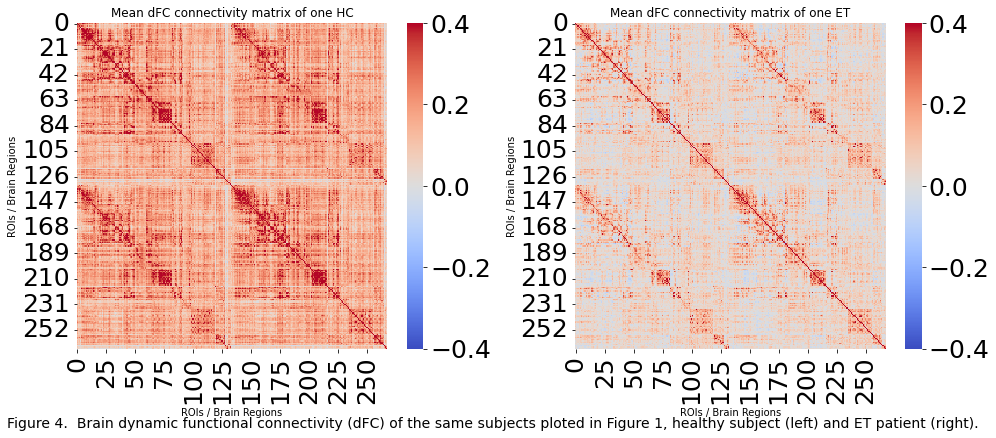

In [28]:
    # Display Features
    # Plot Group mean dFC connectivity matrix of HC and ET
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.heatmap(dFC_hc_group_mean, vmin=-0.4, vmax=0.4, cmap="coolwarm")
    plt.xlabel('ROIs / Brain Regions')
    plt.ylabel('ROIs / Brain Regions')
    plt.title('Mean dFC connectivity matrix of one HC')

    plt.subplot(1,2,2)
    sns.heatmap(dFC_pt_group_mean, vmin=-0.4, vmax=0.4, cmap="coolwarm") 
    plt.xlabel('ROIs / Brain Regions')
    plt.ylabel('ROIs / Brain Regions')
    plt.title('Mean dFC connectivity matrix of one ET')
    txt="Figure 4.  Brain dynamic functional connectivity (dFC) of the same subjects ploted in Figure 1, healthy subject (left) and ET patient (right)."
    plt.figtext(0.01, 0.001, txt, fontsize=14)
    plt.tight_layout()
    plt.show()

### Explanation of Figure 4.

Figure 4 represents the dynamic functional connectivity by taking the mean of all connectivity matrices across time. In this connectivity matrix, the values represent phase-synchronisation between their corresponding (i.e., x & y axis ROIs) pair of brain regions. Higher the values, the stronger the synchronisation between their corresponding brain regions. As expected, there is a bigger difference in the mean DFC matrix of ET patient vs HC compared to the static connectivity matrix shown in figure 3. The connectivity between the pair of ROIs values.  

# Whole brain dynamic features

##### To further represent the brain dynamic repertoire, we assessed different dynamic features, which helps to better understand the brain topological re-organisation/alteration due to disease. For example from the static and dynamic connectivity, we understand the brain connectivity between pair of brain region alters; however, it does not provide the underlying neural properties, such as if the brain network organisation weakens or strengthens and how the overall synchronicity and stability are affected. Hence, to characterize underlying neural properties, the following parameters were extracted.

##### Whole brain dFC: 
To understand brain connectivity level considering temporal flactuation, we compute the mean functional connectivity matrix by taking average over all time point connectivity matrix and the whole brain DFC was computed further taking the average across all between brain regions connectivity values.

##### Network Segregation and integration: 
Beyond brain connectivity, there is a growing interest in understanding the brain network topological organization as it seeks to provide some mechanistic insights into the specificities which substantiate specific patterns of altered connectivity. Generally, brain dynamics and neural synchronicity display distinct topological patterns organized in segregated modules with specific and independent functions, in addition to possessing connections that ensure the integration within and between those modules (Mohr et al., 2016; Deco et al., 2017a)

##### Whole brain syncronisation: 
To understand brain synchronization level, we take mean phase syncronisation between each pair. Its similar to whole brain dFC measure, computed directly taking mean instantaneous phases of all pair of brain regions. 

##### Metastability: 
Metastability quantifies how variable the states of phase configurations are as a function of time. The variability in the global level of synchronization was measured using the standard deviation of the Kuramoto order parameter (Deco et al., 2017a). In an interpretable term, metastability provides the degree to which brain synchronization distinct patterns fluctuate across time — the higher the metastability greater the flexibility between brain regions. Metastability increases during awake and cognitive state, whereas it reduces during sleep, loss of consciousness, or neuropsychiatric disorders. 

###### Intrinsic Ignition:
Intrinsic Ignition measures the capability of a given local node to propagate neural activity to other regions. Intrinsic ignition describes the influence of spontaneously occurring events within the network over time. The propagation of neural activity was measured using the global integration, (ϕ), as described (Deco et al., 2017b), which determines the capacity of the whole network to become interconnected and exchange information. A high intrinsic ignition corresponds to rich and flexible brain dynamics having higher capacity to process event information, whereas low intrinsic ignition is poor, rigid network interaction with reduced neural communication.

###### Reference:
-Mohr, H., Wolfensteller, U., Betzel, R. F., Mišić, B., Sporns, O., Richiardi, J., & Ruge, H. (2016). Integration and segregation of large-scale brain networks during short-term task automatization. Nature Communications, 7. https://doi.org/10.1038/ncomms13217 
-Deco, G., Kringelbach, M. L., Jirsa, V. K., & Ritter, P. (2017a). The dynamics of resting fluctuations in the brain: Metastability and its dynamical cortical core. Scientific Reports, 7(1). https://doi.org/10.1038/s41598-017-03073-5 
-Deco, G. & Kringelbach, M. L. (2017b) Hierarchy of Information Processing in the Brain: A Novel 'Intrinsic Ignition' Framework. Neuron 94, 961-968, doi:10.1016/j.neuron.2017.03.028 

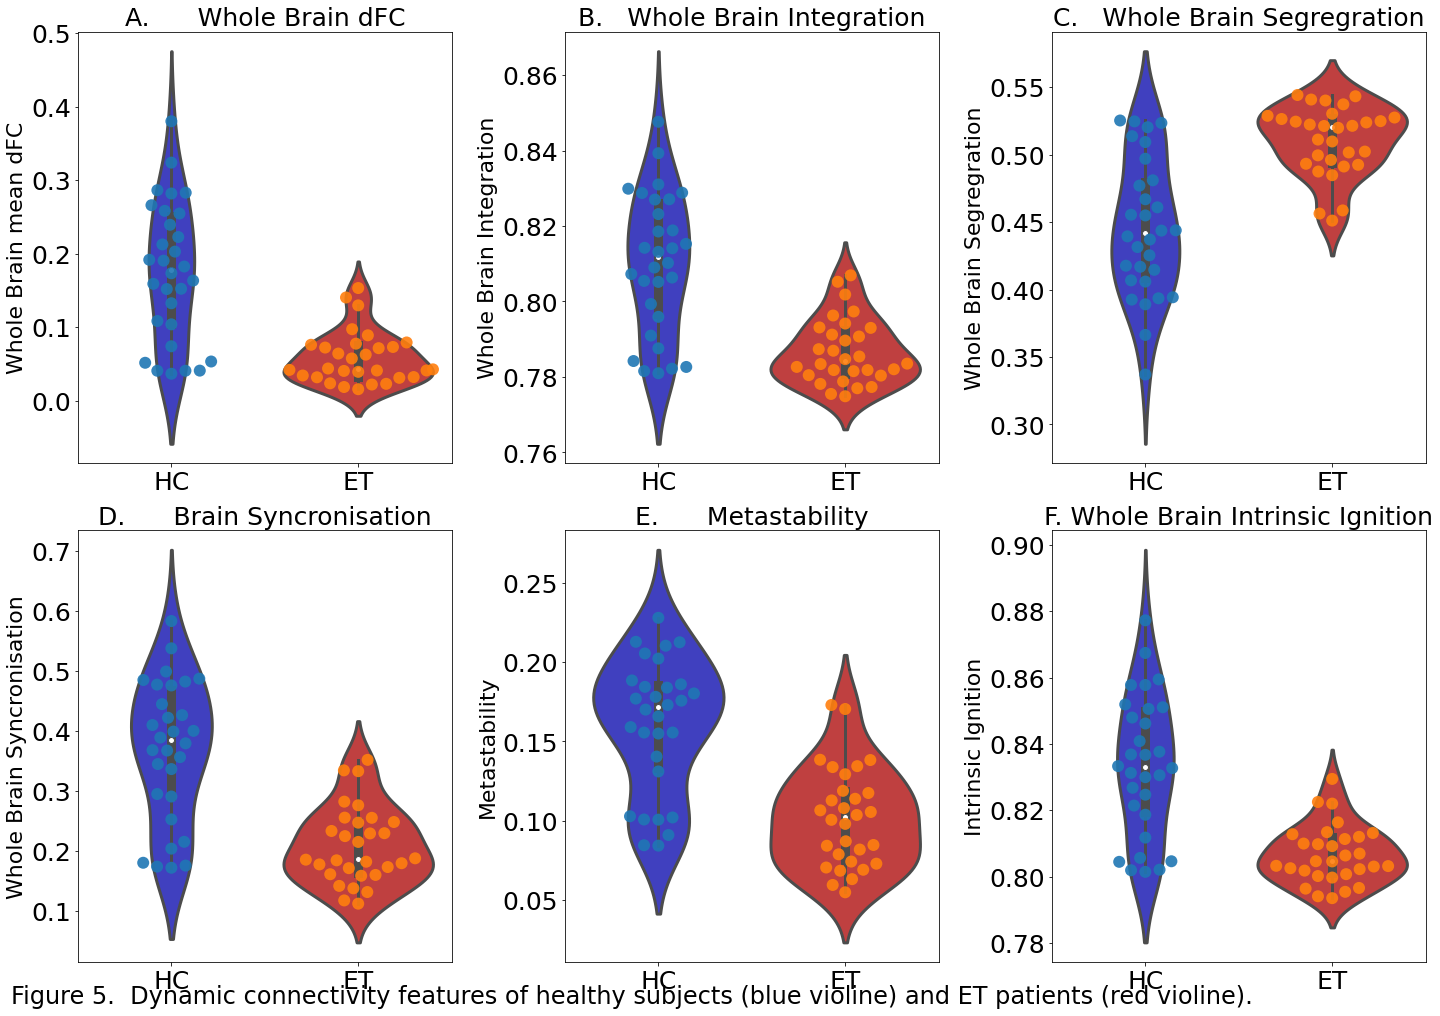

In [29]:
    # Display All the Six Features 
    
    # Plot whole brain dFC of HC and ET in a violin plot
    dFC_wb_mean_df = pd.DataFrame({'HC': np.squeeze(dFC_hc_wb_mean), 'ET': np.squeeze(dFC_pt_wb_mean)})
    plt.figure(figsize=(20,14))
    plt.subplot(2,3,1)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=dFC_wb_mean_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=dFC_wb_mean_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain mean dFC', fontsize=22)
    plt.title('A.      Whole Brain dFC', fontsize=25)  

    #  Plot whole brain integration of HC and ET in a violin plot
    Int_df = pd.DataFrame({'HC': np.squeeze(Int_hc), 'ET': np.squeeze(Int_pt)})
    plt.subplot(2,3,2)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Int_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Int_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain Integration', fontsize=22)
    plt.title('B.   Whole Brain Integration', fontsize=25) 
    
    # Plot whole brain segregataion of HC and ET in a violin plot
    Seg_df = pd.DataFrame({'HC': np.squeeze(Seg_hc), 'ET': np.squeeze(Seg_pt)})
    plt.subplot(2,3,3)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Seg_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Seg_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain Segregration', fontsize=22)
    plt.title('C.   Whole Brain Segregration', fontsize=25)
    
    # Plot whole brain syncronisation of HC and ET in a violin plot
    Sync_df = pd.DataFrame({'HC': np.squeeze(Sync_hc), 'ET': np.squeeze(Sync_pt)})
    plt.subplot(2,3,4)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Sync_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Sync_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain Syncronisation', fontsize=22)
    plt.title('D.      Brain Syncronisation', fontsize=25)  

    # Plot Metastability of HC and ET in a violin plot
    Meta_df = pd.DataFrame({'HC': np.squeeze(Meta_hc), 'ET': np.squeeze(Meta_pt)})
    plt.subplot(2,3,5)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Meta_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Meta_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Metastability', fontsize=22)
    plt.title('E.      Metastability', fontsize=25)  

    # Plot Ignition of HC and ET in a violin plot
    Ignition_df = pd.DataFrame({'HC': np.squeeze(Ignition_hc), 'ET': np.squeeze(Ignition_pt)})
    plt.subplot(2,3,6)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Ignition_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Ignition_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Intrinsic Ignition', fontsize=22)
    plt.title('F. Whole Brain Intrinsic Ignition', fontsize=25)  
    txt="Figure 5.  Dynamic connectivity features of healthy subjects (blue violine) and ET patients (red violine)."
    plt.figtext(0.01, 0.0000001, txt, fontsize=24)
    plt.tight_layout()
    plt.show()

### Explanation of Figure 5.

Figure 5 represents the different Dynamic features such as: A) Whole brain dFC, B) network integration, C) network segregation, D) whole brain synchronisation, E) metastability, F) Intrinsic Ignition. In ET patients, there is increased network segregation, indicating brain connectivity is organised as a more prominent modular pattern and the neural communication is constrained to the local region. On the other hand, we noted the severe loss of whole brain dFC, network integration, metastability and intrinsic ignition, which indicates ET patients' brain have insufficient communication and neural propagation at the whole brain level.

# Need of Classification

The above neuroimaging measures provide the understanding of altered brain dynamics of ET patients. However, in day-to-day clinical practice, clinicians need an interpretable empirical framework and a model to classify patients from healthy individuals. Hence, in this project, we designed a classification model using machine learning algorthim such as Suport Vector Machine (SVM) or Random Forest to distinguish ET patients from HC based on the above dynamic connectivity features.


# Classifier Building and Validation

#Build the classifier using three classification approach. One is using Linear Support Vector Machine (SVM), combining linear SVM with non-linear kernel i.e., radial basis function('rbf')kernel and another by using non-linear random forest by taking above observation/features of healthy subjects and ET patients.

# Choice of Classifier Model

#SVMs are particularly powerful and flexible supervised models that could be used for classification tasks.These are compact models that relies on few support vectors. Since we have neuroimaging dataset with only two group (i.e., HC and ET) and all features have linearity, so, first we will use linear SVM. Then we will combine the SVM with a non-linear kernel such as rbf kernel (radial basis function) that will project the data in a high dimensional space where data could be linearly separated.

To compare the performance of the model we will use another classification approach using Random Forest classifier which is an ensemble of multiple decision trees that overfit a random part of the training data and then average their predictions to find a better classification. It is popularly used for classification tasks because of its high accuracy,feature importance and robustness. Random forest reduces the issue of overfitting and is less sensitive to biases such as noise or outliers in the data.

In [30]:
# The healthy subject data (Subjects x Features) are there in 'HC_Features' variable and 
# ET patients data (Subjects x Features) are there in 'ET_Features' variable
np.shape(HC_Features)
X = np.concatenate([HC_Features, ET_Features], axis = 0) 
y = np.squeeze(sio.loadmat('DFC_Features_Result')['Grp'])

print("Size of Observation and Features data:", X.shape[0], 'and', X.shape[1])
print("Size of Label/subjects:", y.shape[0])

Size of Observation and Features data: 60 and 6
Size of Label/subjects: 60


In [52]:
# Import Machine learning libraries from sklearn to use for linear SVM
from sklearn.preprocessing import StandardScaler     # Standardize features to remove the mean and scaling to unit variance
from sklearn.model_selection import train_test_split #Used to divide the dataset into a training set and a validation set 
from sklearn.model_selection import GridSearchCV # A library from Scikit-learn used to perform a cross-validation as well as to perform hyperparameter tuning to determine the best value for a model
from sklearn.svm import LinearSVC # Used to perform a support vector machine classification
from sklearn.model_selection import cross_val_score # Used to perform a SVM k-fold cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
# Sourse for the code: https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html
# Sourse for the code: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


# Note that, we will use the below train-test for all the classifier model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("Number of features:", X.shape[1])
print("Number of subject for train data:", X_train.shape[0])
print("Number of subject for test data:", X_test.shape[0])
print("Size of train data:", X_train.shape)
print("Size of test data:", X_test.shape)

Number of features: 6
Number of subject for train data: 42
Number of subject for test data: 18
Size of train data: (42, 6)
Size of test data: (18, 6)


### Linear SVM building, training and testing the classifier

In [53]:
# Build the Linear SVM 
StandardScaler().fit(X,y)
lsvc = LinearSVC(random_state=0,multi_class='ovr')
#split the train-test data

# Train the SVM classifier using training data
lsvc.fit(X_train, y_train)

# Test the SVM classifier accuracy from trained model
Train_Score_LSVC = lsvc.score(X_train, y_train)
print("--- Linear SVM TRAIN DATA RESULTS ---")
print("Accuracy for train data: ", Train_Score_LSVC)

# Test the SVM classifier accuracy by test data

print("--- Linear SVM TEST DATA RESULTS ---")
y_pred = lsvc.predict(X_test)

Test_Score_LSVC = lsvc.score(X_test, y_test)
print("Accuracy for test data: ", Test_Score_LSVC)

cm = confusion_matrix(y_test, y_pred)
print(cm)
cr_LSVC = classification_report(y_test, y_pred)
print(cr_LSVC)

--- Linear SVM TRAIN DATA RESULTS ---
Accuracy for train data:  0.7857142857142857
--- Linear SVM TEST DATA RESULTS ---
Accuracy for test data:  0.8333333333333334
[[7 3]
 [0 8]]
              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.73      1.00      0.84         8

    accuracy                           0.83        18
   macro avg       0.86      0.85      0.83        18
weighted avg       0.88      0.83      0.83        18



### rbf kernel SVM building, training and testing the classifier

In [54]:
# Build the SVM with rbf kernel

StandardScaler().fit(X,y)
# Create the SVM
svm_r = SVC(random_state=42, kernel='rbf')
#lsvc = LinearSVC(random_state=0,multi_class='ovr')
#split the train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}  

# Fit the data to rbf-SVM classifier using training data
svm_r = svm_r.fit(X_train, y_train)

# Test the rbf-SVM classifier accuracy from train model
Train_Score_RSVM = svm_r.score(X_train, y_train)
print("--- RBF SVM TRAIN DATA RESULTS ---")
print("Accuracy of train data: ", Train_Score_RSVM)

# Test the rbf-SVM classifier accuracy by test data

print("--- rbf SVM TEST DATA RESULTS ---")

y_pred = svm_r.predict(X_test)

Test_Score_RSVM = svm_r.score(X_test, y_test)
print("Accuracy for test data: ", Test_Score_RSVM)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr_RSVM = classification_report(y_test, y_pred)
print(cr_RSVM)

--- RBF SVM TRAIN DATA RESULTS ---
Accuracy of train data:  0.7857142857142857
--- rbf SVM TEST DATA RESULTS ---
Accuracy for test data:  0.8333333333333334
[[6 2]
 [1 9]]
              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.82      0.90      0.86        10

    accuracy                           0.83        18
   macro avg       0.84      0.82      0.83        18
weighted avg       0.84      0.83      0.83        18



# Random Forest Classification model

In [55]:
# Import Machine laerning libraries from sklearn to use for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Sourse code: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

print("----Random Forest Classification----")
param_grid = {'n_estimators':[10,20,30,40,50,60,70,80,100], 'max_depth':[10, 20]}
print (param_grid)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

RF_score_train = (grid_search.score(X_test, y_test))*100
print("Accuracy of Random Forest:", RF_score_train)

# Test the RF classifier accuracy by test data

print("--- Random Forest TEST DATA RESULTS ---")

y_pred =grid_search.predict(X_test)

Test_Score_RF = grid_search.score(X_test, y_test)
print("Accuracy for test data: ", Test_Score_RF)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr_RF = classification_report(y_test, y_pred)
print(cr_RF)

----Random Forest Classification----
{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100], 'max_depth': [10, 20]}
Accuracy of Random Forest: 77.77777777777779
--- Random Forest TEST DATA RESULTS ---
Accuracy for test data:  0.7777777777777778
[[6 2]
 [2 8]]
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         8
           2       0.80      0.80      0.80        10

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



# Comparision of Classification Performance

In [56]:
print("Accuracy for Linear SVM test data: ", Test_Score_LSVC)
print("Accuracy of rbf SVM test data: ", Test_Score_RSVM)
print("Accuracy for Random Forest test data: ", Test_Score_RF)
print("  ")
print("--- Linear SVM TEST DATA Classification Report ---")
print(cr_LSVC)

print("  ")
print("--- rbf SVM TEST DATA Classification Report ---")
print(cr_RSVM)

print("  ")
print("--- Random Forest TEST DATA Classification Report ---")
print(cr_RF)

Accuracy for Linear SVM test data:  0.8333333333333334
Accuracy of rbf SVM test data:  0.8333333333333334
Accuracy for Random Forest test data:  0.7777777777777778
  
--- Linear SVM TEST DATA Classification Report ---
              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.73      1.00      0.84         8

    accuracy                           0.83        18
   macro avg       0.86      0.85      0.83        18
weighted avg       0.88      0.83      0.83        18

  
--- rbf SVM TEST DATA Classification Report ---
              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.82      0.90      0.86        10

    accuracy                           0.83        18
   macro avg       0.84      0.82      0.83        18
weighted avg       0.84      0.83      0.83        18

  
--- Random Forest TEST DATA Classification Report ---
              precis

# DISCUSSION

Advancement in Machine Learning (ML) has provided oppurtunities to improve various fields including Healthcare. Particularly in medical imaging, machine learning techniques have demonstrated remarkable capabilities. In this work presented we have designed a classifier model using machine learning algorithms that distinguishes ET patients from healthy individuals. We have taken the data (fMRI BOLD time series) and dynamic connectivity features from the published article Bharath et al., 2022.

Here we develope various ML model to predict ET patients using dynamic functional connectivity measures which was the main contribution in this project. We used three classifiers, that is linear SVM, SVM with non-linear or rbf kernel and Random Forest Classifier. We found all the clasifier show more than 77% accuracy in the test data and SVM (both linear and rbf) shows highest classification among them. Then we campare all the three classifier perfomance based on there test data accuracy, accuracy weighted average and f1-score. Besed on these three matrices, Linear SVM shows higher performanc compared to rbf SVM and Random forest.

SVMs offer a robust and powerful approach for classifying essential tremor patients from healthy subjects by leveraging their ability to find optimal hyperplanes that separate different classes in high-dimensional feature spaces. However, like any machine learning technique, their success relies on proper data preprocessing, feature selection, hyperparameter tuning, and thorough evaluation.

We conclude that classifier model predicting well ET patients from HC, which could be potential to use in a clinical setup. One of the big limitation of this study is small sample, that is 60 subject which is very small for building the classification model and overal model performance and its ability to generalise on unseen data. Further study with large sample and taking other movement disorder patients such as Parnkinson´s could improve the useability of the model. 